# Weather Recognition using Transfer Learning Model
Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1
https://lionbridge.ai/datasets/top-10-image-classification-datasets-for-machine-learning/

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Changing the path to Dataset Directory

In [ ]:
%cd /content/drive/My Drive/Datasets/WeatherDataset/
!pwd

/content/drive/My Drive/Datasets/WeatherDataset
/content/drive/My Drive/Datasets/WeatherDataset


### Unzipping the Folder

In [ ]:
#!unzip weather.zip && rm weather.zip

# Importing the Required Libraries

In [ ]:
# Imorting Libraries
import keras
from keras import objectives, backend as K
import tensorflow as tf
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
keras.backend.image_data_format()
from keras.utils import np_utils,plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,InputLayer
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD,RMSprop,Adam,Adagrad
import glob
from PIL import Image
import os.path
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
print('Keras version is {}'.format(keras.__version__))
print ('Tensorflow verson is {}'.format(tf.__version__))
print ('OpenCv version is {}'.format(cv2.__version__))


Keras version is 2.4.3
Tensorflow verson is 2.4.0
OpenCv version is 4.1.2


## Check the Size of images less than 224 x 224
Initially could not convert the images to 224x224. Judging the optimal resize dimension of images.

In [ ]:
data_path = '/content/drive/My Drive/Datasets/WeatherDataset'
data_dir_list = os.listdir(data_path)
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        #input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        filename = os.path.join(data_path + '/'+ dataset + '/'+ img)
        image_jpg = Image.open(filename)
        if (image_jpg.size[0] or image_jpg.size[1])<224 :
          print (img, image_jpg.size)

Loaded the images of dataset-Cloudy

cloudy40.jpg (183, 275)
cloudy46.jpg (194, 259)
cloudy76.jpg (183, 275)
cloudy121.jpg (211, 239)
cloudy139.jpg (183, 275)
cloudy167.jpg (222, 167)
cloudy169.jpg (206, 155)
cloudy164.jpg (205, 300)
cloudy171.jpg (220, 165)
cloudy212.jpg (223, 168)
cloudy192.jpg (211, 159)
cloudy213.jpg (205, 154)
cloudy219.jpg (201, 151)
cloudy176.jpg (207, 156)
cloudy177.jpg (199, 151)
cloudy225.jpg (208, 167)
cloudy216.jpg (203, 153)
cloudy214.jpg (201, 151)
cloudy187.jpg (208, 167)
cloudy259.jpg (211, 159)
cloudy262.jpg (206, 155)
cloudy271.jpg (205, 154)
cloudy269.jpg (201, 151)
cloudy251.jpg (205, 154)
cloudy261.jpg (206, 152)
cloudy263.jpg (203, 163)
cloudy246.jpg (223, 168)
cloudy275.jpg (213, 160)
cloudy281.jpg (209, 155)
cloudy277.jpg (201, 151)
cloudy288.jpg (219, 151)
cloudy274.jpg (221, 166)
Loaded the images of dataset-Sunrise

sunrise126.jpg (190, 265)
sunrise132.jpg (194, 259)
sunrise166.jpg (212, 238)
sunrise230.jpg (214, 176)
sunrise235.jpg (220, 165

## Loading , Resizing (128x128) and Labeling Images
optimal size for Resized image is 128x128

In [ ]:
# Define data path
data_path = '/content/drive/My Drive/Datasets/WeatherDataset'
data_dir_list = os.listdir(data_path)
img_rows=128
img_cols=128
num_channel=3
num_epoch=100
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)
print(no_images)
# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 4
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        #print(img,input_img.size)
        img_data_list.append(input_img_resize)
        if dataset[0:3]==  'Clo':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0:3] == 'Rai':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0:3] == 'Shi':
            labels[label_index] = 2
            #print(dataset[0])
        if dataset[0:3]==  'Sun':
            labels[label_index]=  3
            #print(dataset[0])
        label_index = label_index+1

1123
Loaded the images of dataset-Cloudy

Loaded the images of dataset-Sunrise

Loaded the images of dataset-Shine

Loaded the images of dataset-Rain



### Normalizing the images between 0 and 1 by dividing it with 255

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(1123, 128, 128, 3)


### Chaning the Image dimension ordering to row X height X num_channels and Labeling each image from class 0 to 3

In [ ]:
# Using 'th' for the image_dim_ordering we get accuracy >=0.99 .
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs

if num_channel==1:
    if K.image_data_format()=='th':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3)
        print (img_data.shape)

else:
    if K.image_data_format()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)
        labels[0:299] = 0
        labels[300:513] = 1
        labels[514:766] = 2
        labels[767:1122] = 3

labels[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

## Train / Test Split data with 70/30 ratio

In [ ]:
# Define the number of classes
num_classes = 4
names = ['Cloudy','Rain','Shine','Sunrise']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset with random state=2
x,y = shuffle(img_data, Y, random_state=2)
# Split the dataset with 30% testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("X_train size is {} and y_train size is {}".format(X_train.shape,y_train.shape))
print("X_test size is {} and y_test size is {}".format(X_test.shape,y_test.shape))

X_train size is (786, 128, 128, 3) and y_train size is (786, 4)
X_test size is (337, 128, 128, 3) and y_test size is (337, 4)


## MobileNetV2 Model trained with imagenet weights

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Model
mnetv2 = MobileNetV2(include_top=False,weights='imagenet',input_shape=(128,128,3))
output = mnetv2.layers[-1].output
output = keras.layers.Flatten()(output)

mnetv2_model = Model(mnetv2.input, output)
mnetv2_model.trainable = False

for layer in mnetv2_model.layers:
  layer.trainable = False

mnetv2_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
mnetv2_model.output_shape[1]

20480

### Check the status of Trainable Layers

In [ ]:
import pandas as pd
pd.set_option('max_colwidth',None)

layers = [(layer, layer.name, layer.trainable) for layer in mnetv2_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd11e707438>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd11e766080>,Conv1,False
2,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd11e751f98>,bn_Conv1,False
3,<tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7fd11e0e7748>,Conv1_relu,False
4,<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7fd11e751c88>,expanded_conv_depthwise,False
...,...,...,...
150,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd11a444be0>,block_16_project_BN,False
151,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd11a467c50>,Conv_1,False
152,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd11a45fb70>,Conv_1_bn,False
153,<tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x7fd11a3f8278>,out_relu,False


### Customizing the Model as per our requirement

In [ ]:
input_shape = mnetv2_model.output_shape[1]
model_mnv2 = Sequential()
model_mnv2.add(mnetv2_model)

model_mnv2.add(Dense(16, activation='relu'))
model_mnv2.add(Dropout(0.2))

model_mnv2.add(Dense(4, activation='softmax'))
learning_rate = 0.0001
opt = Adam(lr=learning_rate)

model_mnv2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_mnv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 20480)             2257984   
_________________________________________________________________
dense (Dense)                (None, 16)                327696    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 2,585,748
Trainable params: 327,764
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Datasets/Weather_mnetv2.weights.best.hdf5', verbose=1,save_best_only=True)
history = model_mnv2.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), verbose=True,callbacks=[checkpointer])

Epoch 1/100
13/13 [==============================] - 4s 123ms/step - loss: 1.6160 - accuracy: 0.3676 - val_loss: 0.8023 - val_accuracy: 0.7537

Epoch 00001: val_loss improved from inf to 0.80231, saving model to /content/drive/My Drive/Datasets/Weather_mnetv2.weights.best.hdf5
Epoch 2/100
13/13 [==============================] - 1s 41ms/step - loss: 0.6894 - accuracy: 0.7466 - val_loss: 0.5192 - val_accuracy: 0.8368

Epoch 00002: val_loss improved from 0.80231 to 0.51920, saving model to /content/drive/My Drive/Datasets/Weather_mnetv2.weights.best.hdf5
Epoch 3/100
13/13 [==============================] - 1s 42ms/step - loss: 0.4659 - accuracy: 0.8288 - val_loss: 0.3790 - val_accuracy: 0.8724

Epoch 00003: val_loss improved from 0.51920 to 0.37901, saving model to /content/drive/My Drive/Datasets/Weather_mnetv2.weights.best.hdf5
Epoch 4/100
13/13 [==============================] - 1s 42ms/step - loss: 0.3302 - accuracy: 0.8763 - val_loss: 0.3111 - val_accuracy: 0.8961

Epoch 00004: val_

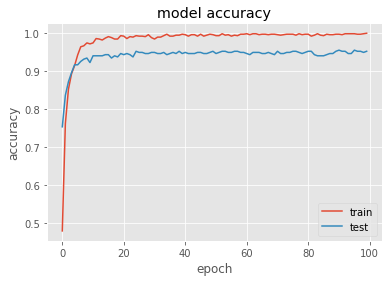

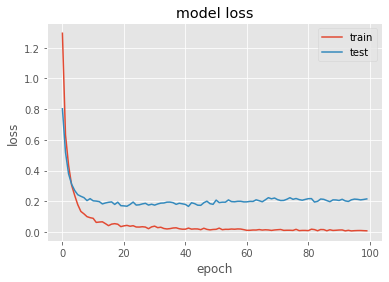

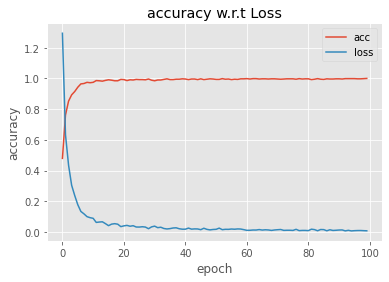

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy history with loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('accuracy w.r.t Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper right')
plt.show()

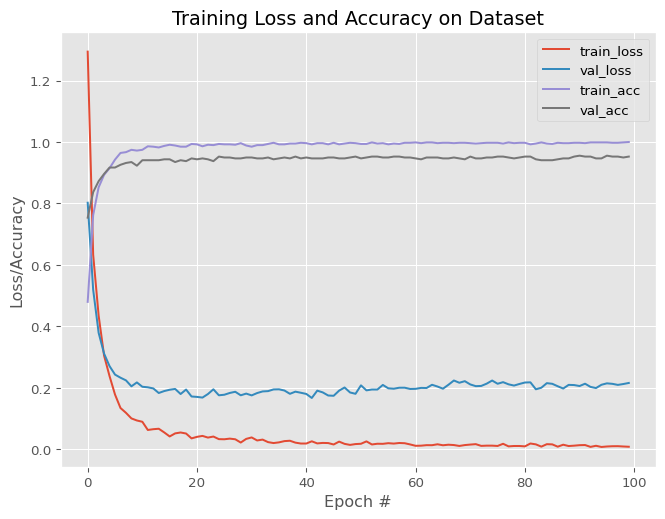

In [ ]:
# plot the training loss and accuracy
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize=(8, 6),dpi=96)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# load the weights that yielded the best validation accuracy
model_mnv2.load_weights('/content/drive/My Drive/Datasets/Weather_mnetv2.weights.best.hdf5')

In [ ]:
# Evaluate the model w.r.t Train Loss and Train Accuracy
score = model_mnv2.evaluate(X_train, y_train, verbose=1)

print('Train Loss:{:.3f}%'.format(score[0]*100))

print('Train accuracy:{:.3f}%'.format(score[1]*100))
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model_mnv2.evaluate(X_test, y_test, verbose=1)
print('Test Loss:{:.3f}%'.format(score[0]*100))

print('Test accuracy:{:.3f}%'.format(score[1]*100))


25/25 [==============================] - 1s 16ms/step - loss: 0.0016 - accuracy: 1.0000
Train Loss:0.159%
Train accuracy:100.000%
11/11 [==============================] - 0s 15ms/step - loss: 0.1669 - accuracy: 0.9466
Test Loss:16.689%
Test accuracy:94.659%


In [ ]:
y_pred = model_mnv2.predict(X_test)

In [ ]:
print(classification_report(np.argmax(y_test,axis=-1),np.argmax(y_pred,axis=-1),target_names=names))

              precision    recall  f1-score   support

      Cloudy       0.94      0.88      0.91        91
        Rain       0.98      1.00      0.99        58
       Shine       0.90      0.93      0.92        75
     Sunrise       0.97      0.98      0.97       113

    accuracy                           0.95       337
   macro avg       0.95      0.95      0.95       337
weighted avg       0.95      0.95      0.95       337



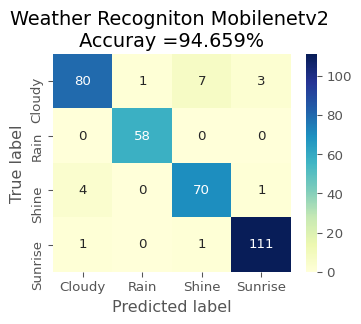

[[ 80   1   7   3]
 [  0  58   0   0]
 [  4   0  70   1]
 [  1   0   1 111]]


In [ ]:
model_accuracy = score[1]
import pandas as pd
import seaborn as sns
cm = confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(y_pred,axis=-1))
cm_df = pd.DataFrame(cm,
index = ['Cloudy','Rain','Shine','Sunrise' ],
columns = ['Cloudy','Rain','Shine','Sunrise'])
plt.figure(figsize=(4,3),dpi=96)
sns.heatmap(cm_df, annot=True,cmap='YlGnBu',fmt='g')
plt.title('Weather Recogniton Mobilenetv2 \n Accuray ={0:.3f}% '.format(model_accuracy*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(cm)

## VGG19 Model trained with imagenet weights

In [ ]:
from keras.applications import vgg19
from keras.models import Model
import keras

vgg = vgg19.VGG19(include_top=False, weights='imagenet',input_shape=(128,128,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

## Checking the status of Trainable Layers

In [ ]:
vgg_model.output_shape[1]
import pandas as pd
pd.set_option('max_colwidth',None)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcfc7afb208>,input_2,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd11a43c908>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcfc7afb3c8>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcfc7a1d278>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcfc7a1d1d0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd180104f60>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fcfc7a35ac8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcfc7ce1978>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcfc7c4ed30>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fcfc7a7c0f0>,block3_conv3,False


## Customizing the Model as Per Our Requirement

In [ ]:
input_shape = vgg_model.output_shape[1]
model_vgg = Sequential()
model_vgg.add(vgg_model)
model_vgg.add(Dense(16, activation='relu', input_dim=input_shape))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(4, activation='softmax'))
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model_vgg.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 8192)              20024384  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                131088    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 20,155,540
Trainable params: 131,156
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Datasets/Weather_vgg19.weights.best.hdf5', verbose=1,save_best_only=True)
history = model_vgg.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), verbose=True,callbacks=[checkpointer])

Epoch 1/100
13/13 [==============================] - 5s 243ms/step - loss: 1.5756 - accuracy: 0.2270 - val_loss: 1.2518 - val_accuracy: 0.5163

Epoch 00001: val_loss improved from inf to 1.25184, saving model to /content/drive/My Drive/Datasets/Weather_vgg19.weights.best.hdf5
Epoch 2/100
13/13 [==============================] - 2s 143ms/step - loss: 1.3007 - accuracy: 0.3707 - val_loss: 1.0992 - val_accuracy: 0.5816

Epoch 00002: val_loss improved from 1.25184 to 1.09924, saving model to /content/drive/My Drive/Datasets/Weather_vgg19.weights.best.hdf5
Epoch 3/100
13/13 [==============================] - 2s 144ms/step - loss: 1.1016 - accuracy: 0.5637 - val_loss: 0.9758 - val_accuracy: 0.7211

Epoch 00003: val_loss improved from 1.09924 to 0.97578, saving model to /content/drive/My Drive/Datasets/Weather_vgg19.weights.best.hdf5
Epoch 4/100
13/13 [==============================] - 2s 145ms/step - loss: 0.9973 - accuracy: 0.6444 - val_loss: 0.8782 - val_accuracy: 0.7300

Epoch 00004: val_

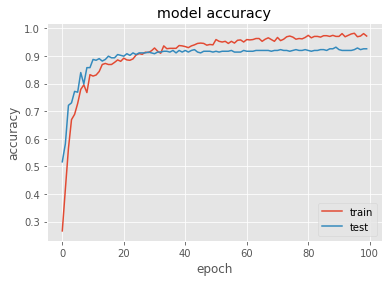

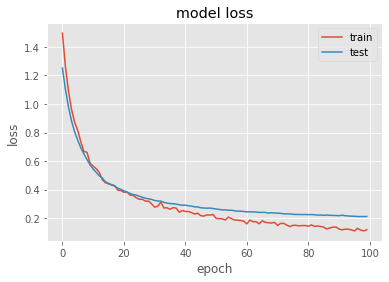

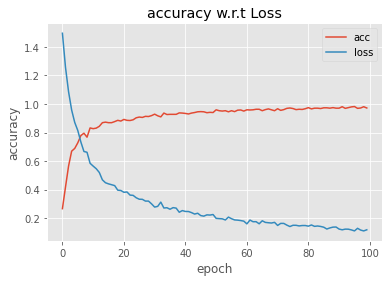

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy history with loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('accuracy w.r.t Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper right')
plt.show()

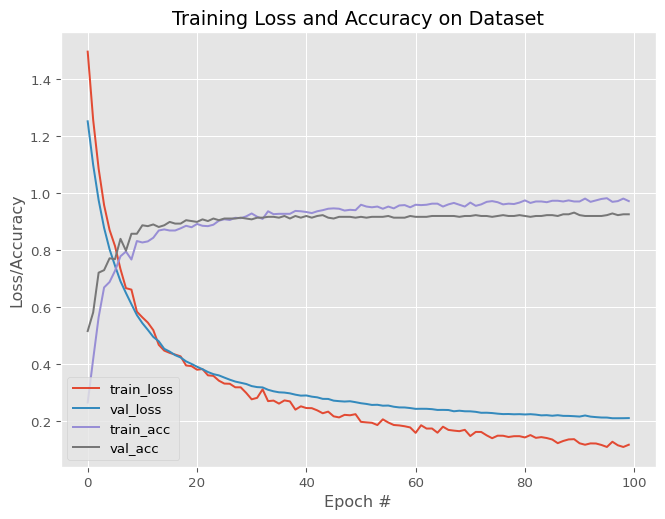

In [ ]:
# plot the training loss and accuracy
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize=(8, 6),dpi=96)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
#load the weights that yielded the best validation accuracy
model_vgg.load_weights('/content/drive/My Drive/Datasets/Weather_vgg19.weights.best.hdf5')

In [ ]:
# Evaluate the model w.r.t Train Loss and Train Accuracy
score = model_vgg.evaluate(X_train, y_train, verbose=1)

print('Train Loss:{:.3f}%'.format(score[0]*100))

print('Train accuracy:{:.3f}%'.format(score[1]*100))
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model_vgg.evaluate(X_test, y_test, verbose=1)
print('Test Loss:{:.3f}%'.format(score[0]*100))

print('Test accuracy:{:.3f}%'.format(score[1]*100))


25/25 [==============================] - 2s 55ms/step - loss: 0.0541 - accuracy: 0.9962
Train Loss:5.407%
Train accuracy:99.618%
11/11 [==============================] - 1s 53ms/step - loss: 0.2106 - accuracy: 0.9288
Test Loss:21.063%
Test accuracy:92.878%


In [ ]:
y_pred = model_vgg.predict(X_test)
print(classification_report(np.argmax(y_test,axis=-1),np.argmax(y_pred,axis=-1),target_names=names))

              precision    recall  f1-score   support

      Cloudy       0.90      0.89      0.90        91
        Rain       0.95      0.93      0.94        58
       Shine       0.86      0.91      0.88        75
     Sunrise       0.99      0.97      0.98       113

    accuracy                           0.93       337
   macro avg       0.92      0.93      0.92       337
weighted avg       0.93      0.93      0.93       337



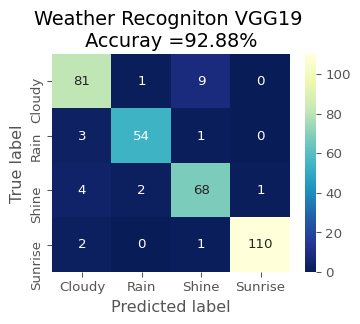

[[ 81   1   9   0]
 [  3  54   1   0]
 [  4   2  68   1]
 [  2   0   1 110]]


In [ ]:
import pandas as pd
import seaborn as sns
model_accuracy=score[1]
cm = confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(y_pred,axis=-1))
cm_df = pd.DataFrame(cm,
index = ['Cloudy','Rain','Shine','Sunrise' ],
columns = ['Cloudy','Rain','Shine','Sunrise'])
plt.figure(figsize=(4,3),dpi=96)
sns.heatmap(cm_df, annot=True,cmap='YlGnBu_r',fmt='g')
plt.title('Weather Recogniton VGG19 \n Accuray ={0:.2f}% '.format(model_accuracy*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(cm)